Deanna Clayton Mod7 Ch15 Practice

15.2 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 1

In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sklearn

In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [9]:
digits.data.shape

(1797, 64)

In [10]:
digits.target.shape

(1797,)

In [11]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [12]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [13]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [14]:
digits.target[22]

2

In [15]:
import matplotlib.pyplot as plt

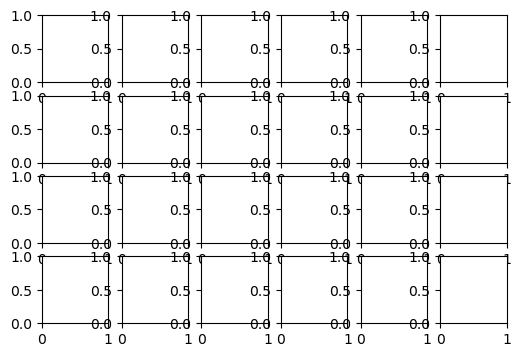

In [16]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [17]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

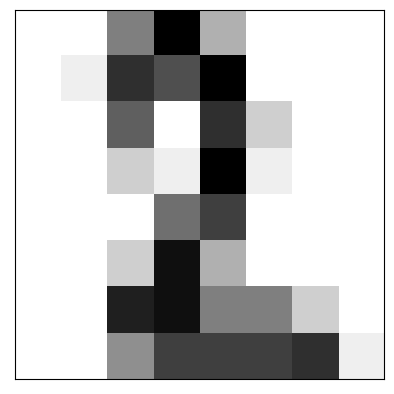

In [23]:
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)

In [26]:
X_train.shape

(1347, 64)

In [27]:
X_test.shape

(450, 64)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [31]:
predicted = knn.predict(X=X_test)

In [32]:
expected = y_test

In [33]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [34]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [35]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [36]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [37]:
wrong = []

In [38]:
for p, e in zip(predicted, expected):
    if p != e:
        wrong.append((p, e))

In [39]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

15.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2

In [41]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [44]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report

In [46]:
names = [str(digit) for digit in digits.target_names]

In [47]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [48]:
import pandas as pd

In [50]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

In [51]:
import seaborn as sns

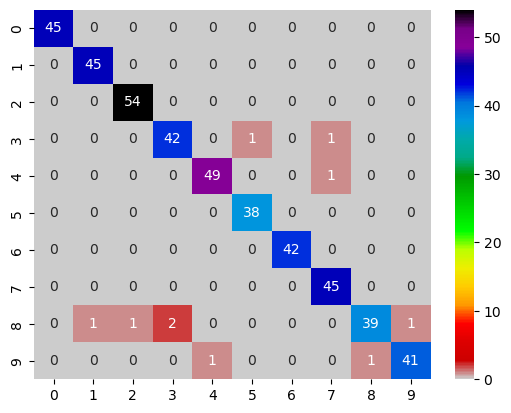

In [52]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [53]:
from sklearn.model_selection import KFold

In [54]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

In [57]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [58]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [59]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


In [60]:
from sklearn.svm import SVC

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [65]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [67]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:>2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k= 1; mean accuracy=98.83%; standard deviation=0.58%
k= 3; mean accuracy=98.83%; standard deviation=0.72%
k= 5; mean accuracy=98.72%; standard deviation=0.75%
k= 7; mean accuracy=98.44%; standard deviation=0.96%
k= 9; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


15.4 Case Study: Time Series and Simple Linear Regression

In [68]:
import pandas as pd

In [70]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [71]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [72]:
nyc.Date = nyc.Date.floordiv(100)

In [73]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [76]:
X_train.shape

(93, 1)

In [77]:
X_test.shape

(31, 1)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
linear_regression = LinearRegression()

In [80]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [81]:
linear_regression.coef_

array([0.01939167])

In [82]:
linear_regression.intercept_

-0.30779820252657686

In [83]:
predicted = linear_regression.predict(X_test)

In [84]:
expected = y_test

In [86]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [87]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [88]:
predict(2019)

array([38.84399018])

In [89]:
predict(1890)

array([36.34246432])

In [90]:
import seaborn as sns

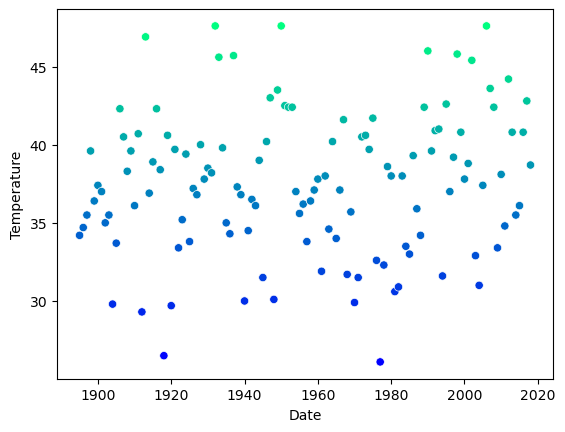

In [91]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

In [93]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [94]:
import numpy as np

In [95]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [102]:
y = predict(x)

In [103]:
import matplotlib.pyplot as plt

In [104]:
line = plt.plot(x, y)

In [ ]:
predict(1889)

In [ ]:
predict(2100)